https://www.rottentomatoes.com/ 는 영화 리뷰 사이트이다.

여기에서 제공하는 'top box office'에 있는 영화들의 고객 평점과 평론가들의 비평을 분석하고자 한다. 

In [0]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [0]:
url = "https://www.rottentomatoes.com/"
html = urlopen(url)
source = html.read()  #바이트 코드 type으로 소스를 읽는다.
html.close() #urlopen을 진행한 후에는 close를 한다

movie_spec = {}

soup = BeautifulSoup(source, "html5lib") 
table = soup.find(id="Top-Box-Office")
movies = table.find_all(class_="middle_col")  #top_Box_Office에 있는 영화들의 리스트는 'middle_col'로 찾을 수 있다. 

for movie in movies:
  title = movie.get_text()
  link = movie.a.get('href')
  url = 'https://www.rottentomatoes.com' +link
  movie_spec[title.strip()] = url 
print(movie_spec)

{'Ralph Breaks the Internet': 'https://www.rottentomatoes.com/m/ralph_breaks_the_internet', 'The Grinch': 'https://www.rottentomatoes.com/m/the_grinch', 'Creed II': 'https://www.rottentomatoes.com/m/creed_ii', 'Fantastic Beasts: The Crimes of Grindelwald': 'https://www.rottentomatoes.com/m/fantastic_beasts_the_crimes_of_grindelwald', 'Bohemian Rhapsody': 'https://www.rottentomatoes.com/m/bohemian_rhapsody', 'Instant Family': 'https://www.rottentomatoes.com/m/instant_family', 'Green Book': 'https://www.rottentomatoes.com/m/green_book', 'Robin Hood': 'https://www.rottentomatoes.com/m/robin_hood_2018', 'The Possession of Hannah Grace': 'https://www.rottentomatoes.com/m/the_possession_of_hannah_grace', 'Widows': 'https://www.rottentomatoes.com/m/widows_2018'}


In [0]:
import time # 매 페이지 요청마다 1초의 딜레이를 넣기 위한 모듈

movie_op = {} # 영화 이름과 관객 평가를 저장하기 위한 딕셔너리 

for name, url in movie_spec.items():
  source = BeautifulSoup(urlopen(url), 'html.parser')
  op = source.find('div', {"class":"meter-value"})  #<div> 엘리멘트 안에서 class:meter-value 이라는 값을 이용해 탐색
  movie_op[name] = op.get_text().split()[-1]
  time.sleep(1) # 1초 대기
  
print (movie_op)


{'Ralph Breaks the Internet': '68%', 'The Grinch': '57%', 'Creed II': '85%', 'Fantastic Beasts: The Crimes of Grindelwald': '62%', 'Bohemian Rhapsody': '91%', 'Instant Family': '85%', 'Green Book': '95%', 'Robin Hood': '46%', 'The Possession of Hannah Grace': '34%', 'Widows': '63%'}


In [0]:
final_data = sorted(movie_op.items(), key = lambda x: x[1], reverse=True)  #영화 평점순별로 내림차순으로 진행한다. 
print(final_data)  

[('Green Book', '95%'), ('Bohemian Rhapsody', '91%'), ('Creed II', '85%'), ('Instant Family', '85%'), ('Ralph Breaks the Internet', '68%'), ('Widows', '63%'), ('Fantastic Beasts: The Crimes of Grindelwald', '62%'), ('The Grinch', '57%'), ('Robin Hood', '46%'), ('The Possession of Hannah Grace', '34%')]


# 1. 시각화 
영화 제목과 평점을 막대 그래프로 그려 시각화 한다. 

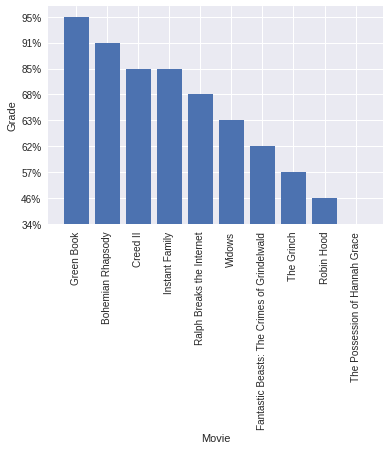

In [0]:
%matplotlib inline
# IPython 환경에서 그래프를 코드 셀 바로 아래에 출력하게 하는 magic function
from matplotlib import pyplot # 그래프를 그리기 위한 라이브러리 로드

movie = [t[0] for t in final_data[:10]] # final_data 리스트의 모든 원소(tuple)를 꺼내고 그 tuple의 첫 번째 값(이름)을 추출
grade = [t[1] for t in final_data[:10]] # final_data 리스트에서 모든 원소(tuple)를 꺼내고 그 tuple의 두 번째 값(가격)을 추출

pyplot.bar(range(len(movie)), grade, tick_label=movie)
pyplot.xticks(fontsize=10, rotation=90)  #영화 이름이 길어서 세로로 바꿔주었다. 
pyplot.yticks(fontsize=10)
pyplot.xlabel('Movie') # x축 축 이름을 movie로 지정
pyplot.ylabel('Grade') # y축 축 이름을 Grade로 지정
pyplot.show()

# 2. 감성분석
top_box_office에 있는 영화 10개에 대한 평론가들의 비평을 불러온다.
그 후 감성분석을 통해 대체적으로 위 영화들이 긍정적인 평을 받았는지 부정적인 평을 받았는지 분석하고자 한다. 


In [0]:
movie_review = {} # 영화 이름과 리뷰 페이지 주소를 저장할 딕셔너리

for name, url in movie_spec.items():
  url_review = url + '/reviews/'
  movie_review[name] = url + '/reviews/'  # 상세 페이지 주소를 리뷰 페이지 주소로 변환

print (movie_review)


{'Ralph Breaks the Internet': 'https://www.rottentomatoes.com/m/ralph_breaks_the_internet/reviews/', 'The Grinch': 'https://www.rottentomatoes.com/m/the_grinch/reviews/', 'Creed II': 'https://www.rottentomatoes.com/m/creed_ii/reviews/', 'Fantastic Beasts: The Crimes of Grindelwald': 'https://www.rottentomatoes.com/m/fantastic_beasts_the_crimes_of_grindelwald/reviews/', 'Bohemian Rhapsody': 'https://www.rottentomatoes.com/m/bohemian_rhapsody/reviews/', 'Instant Family': 'https://www.rottentomatoes.com/m/instant_family/reviews/', 'Green Book': 'https://www.rottentomatoes.com/m/green_book/reviews/', 'Robin Hood': 'https://www.rottentomatoes.com/m/robin_hood_2018/reviews/', 'The Possession of Hannah Grace': 'https://www.rottentomatoes.com/m/the_possession_of_hannah_grace/reviews/', 'Widows': 'https://www.rottentomatoes.com/m/widows_2018/reviews/'}


In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [0]:
sia = SentimentIntensityAnalyzer() # 감성 분석을 위한 클래스 선언

print ("--- Sentiment Scores ----")
for name, url in movie_review.items():
  source = BeautifulSoup(urlopen(url), 'html.parser')
  Ps = source.find_all('div', class_="the_review") # 소비자 의견이 담긴 <div> 엘리멘트 탐색

  opins = []
  for P in Ps:
    opins.append(P.get_text()) # 탐색된 모든 엘리멘트를 리스트에 저장

  opinion = " ".join(opins) # 모든 의견을 하나의 문자열로 병합
  print ("{:15} : {:+4}".format(name, sia.polarity_scores(opinion)["compound"]))
  time.sleep(1) # 1초 대기

--- Sentiment Scores ----
Ralph Breaks the Internet : +0.9987
The Grinch      : +0.9983
Creed II        : +0.241
Fantastic Beasts: The Crimes of Grindelwald : +0.6243
Bohemian Rhapsody : +0.995
Instant Family  : +0.9943
Green Book      : +0.9973
Robin Hood      : +0.9076
The Possession of Hannah Grace : -0.9716
Widows          : +0.9959


Vader Sentiment Analyzer의 compound 점수는 1에 가까울 수록 긍정적, -1에 가까울 수록 부정적인 것을 의미한다.

'The Possession of Hannah Grace'영화를 제외하고는 모두 다 긍정적인 비평을 받은 것을 알 수 있다. 

이 영화는 관람객들의 평점에서도 가장 낮은 퍼센트인 33%를 받았다. 

그 외의 영화들은 모두 꽤 높은 긍정적인 평을 받은 것으로 보여진다. 